# Introduction

When applying machine learning to real-world data, there are a lot of steps involved in the process -- starting with collecting the data and ending with generating predictions. (We work with the seven steps of machine learning, as defined by Yufeng Guo here.)

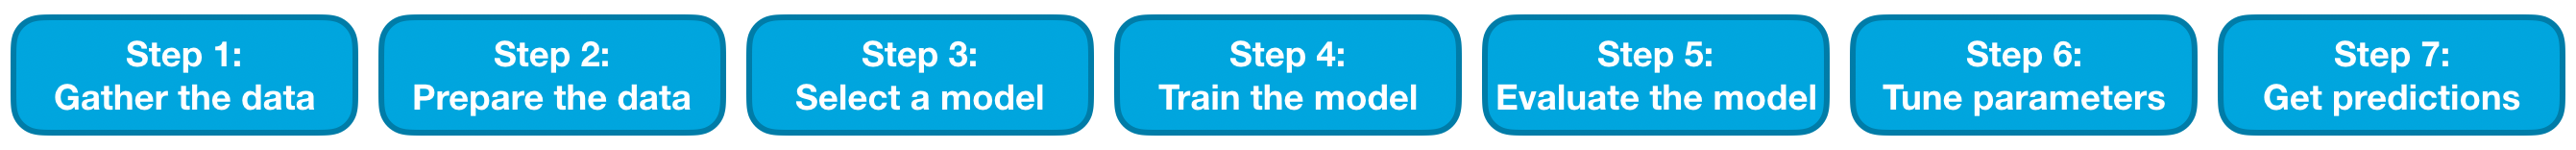

It all begins with **Step 1: Gather the data**. In industry, there are important considerations you need to take into account when building a dataset, such as `target leakage`(https://www.kaggle.com/alexisbcook/data-leakage) . When participating in a Kaggle competition, this step is already completed for you.

In the `Intro to Machine Learning` and the `Intermediate Machine Learning` courses, you can learn how to:

* **Step 2: Prepare the data** - Deal with missing values and categorical data. (Feature engineering is covered in a separate course.)
* **Step 4: Train the model** - Fit decision trees and random forests to patterns in training data.
* **Step 5: Evaluate the model** - Use a validation set to assess how well a trained model performs on unseen data.
* **Step 6: Tune parameters** - Tune parameters to get better performance from XGBoost models.
* **Step 7: Get predictions** - Generate predictions with a trained model and submit your results to a Kaggle competition.

That leaves **Step 3: Select a model**. There are a lot of different types of models. Which one should you select for your problem? When you're just getting started, the best option is just to try everything and build your own intuition - there aren't any universally accepted rules. There are also many useful Kaggle notebooks (like this one) where you can see how and when other Kagglers used different models.

Mastering the machine learning process involves a lot of time and practice. While you're still learning, you can turn to **automated machine learning (AutoML) tools** to generate intelligent predictions.

# Code 

We'll work with data from the **New York City Taxi Fare Prediction** competition. In this competition, we want you to predict the fare amount (inclusive of tolls) for a taxi ride in New York City, given the pickup and dropoff locations, number of passengers, and the pickup date and time.

To do this, we'll use a **Python class** that calls on AutoML Tables. To use this code, you need only define the following variables:

* PROJECT_ID - The name of your Google Cloud project. All of the work that you'll do in Google Cloud is organized in "projects".
* BUCKET_NAME - The name of your Google Cloud storage bucket. In order to work with AutoML, we'll need to create a storage bucket, where we'll upload the Kaggle dataset.
* DATASET_DISPLAY_NAME - The name of your dataset.
* TRAIN_FILEPATH - The filepath for the training data (train.csv file) from the competition.
* TEST_FILEPATH - The filepath for the test data (test.csv file) from the competition.
* TARGET_COLUMN - The name of the column in your training data that contains the values you'd like to predict.
* ID_COLUMN - The name of the column containing IDs.
* MODEL_DISPLAY_NAME - The name of your model.
* TRAIN_BUDGET - How long you want your model to train (use 1000 for 1 hour, 2000 for 2 hours, and so on).

All of these variables will make more sense when you run your own code in the following exercise!

 *Code is on AutoML tutorial !*

# Introduction

In this notebook, you'll use **Google Cloud AutoML Tables** to generate a submission for a Kaggle competition.

You'll work with the **[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)** competition. The competition is simple: we want you to use 79 different explanatory variables (such as the type of roof, number of bedrooms, and number of bathrooms) to predict home prices.

# Note

Before we begin, an important note! 
<div class="alert alert-block alert-info">
<b>Note</b>: Google Cloud AutoML Tables is a <b>paid service</b>. At the time of publishing, it charges \$19.32 per hour of compute during training and \$1.16 per hour of compute for batch prediction.  You can find more details <a href="https://cloud.google.com/automl-tables/pricing"><b>here</b></a>.  
</div><br> 

Furthermore, this notebook is **optional** and does not have to be completed to get full credit for the **[Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)** course.

# Set up the notebook

To begin, we'll need to make sure that your notebook is set up to run the code.  Begin by looking at the **"Settings"** menu to the right of your notebook.  Your menu will look like one of the following:

<center>
<img src="https://i.imgur.com/kR1az0y.png" width=100%><br/>
</center>

If your **"Internet"** setting appears as a **"Requires phone verification"** link, click on this link.  This will bring you to a new window; then, follow the instructions to verify your account.  After following this step, your **"Internet"** setting will appear **"Off"**, as in the example to the right.

Once your **"Internet"** setting appears as **"Off"**, click to turn it on.  You'll see a pop-up window that you'll need to **"Accept"** in order to complete the process and have the setting switched to **"On"**.  

<center>
<img src="https://i.imgur.com/gOVh6Aa.png" width=100%><br/>
</center>

Once you have followed the steps above, you're ready to proceed!


# Set up Google Cloud

Next, create a Google Cloud account by following the instructions **[here](https://www.kaggle.com/alexisbcook/get-started-with-google-cloud-platform)**.  You'll also learn how to claim $300 of free credits!

Then, connect your Google Cloud account to this notebook by selecting **Add-ons > Google Cloud Services**.

![](https://i.imgur.com/UHB4P5o.png)

In the pop-up window, select **Cloud Storage** and **AutoML (beta)**.  Then click on **Link Account**.

![](https://i.imgur.com/IlbdbHD.png)

You'll see another pop-up that tells you about Google AutoML pricing.  Once you have reviewed this information, click on **ENABLE**.  Then, sign in with the e-mail address that is linked to your Google Cloud account.  

Once your account is attached to the notebook, you can close the pop-up.

# Get started with AutoML

We have supplied values for the following variables for you:
- `DATASET_DISPLAY_NAME` - The name of your dataset (should use at most 32 characters; allowed characters: ASCII Latin letters A-Z and a-z, an underscore ("\_"), and ASCII digits 0-9).  
- `TRAIN_FILEPATH` - The filepath for the training data (`train.csv` file) from the competition.
- `TEST_FILEPATH` - The filepath for the test data (`test.csv` file) from the competition.
- `TARGET_COLUMN` - The name of the column in your training data that contains the values you'd like to predict.
- `ID_COLUMN` - The name of the column containing IDs.
- `MODEL_DISPLAY_NAME` - The name of your model (should use at most 32 characters; allowed characters: ASCII Latin letters A-Z and a-z, an underscore ("\_"), and ASCII digits 0-9).
- `TRAIN_BUDGET` - How long you want your model to train (use 1000 for 1 hour, 2000 for 2 hours, and so on).  In this case, since we filled in a value of 2000, the model will train for up to two hours.  **At the time of publishing, AutoML charges $19.32 for each hour of training.**  For some general guidelines about how to select this value, check out the notes on training budget at [this link](https://cloud.google.com/automl-tables/docs/train).

You'll need to fill in values for:
- `PROJECT_ID` -  The project ID you created when following the instructions to create a Google Cloud account.  
- `BUCKET_NAME` - The name of your [Google Cloud storage bucket](https://cloud.google.com/storage/docs/creating-buckets).  In order to work with AutoML, we'll need to create a storage bucket, where we'll upload the Kaggle dataset.  Running the code cell will create the bucket for you.  Use these guidelines when creating a bucket name:
  - Bucket names must contain only lowercase letters, numbers, dashes ("-"), and underscores ("_"). Spaces are not allowed. 
  - Bucket names must start and end with a number or letter.
  - Bucket names must contain 3-63 characters. 

Once you've done that, run the code cell.